# Лабораторная работа №5
## Решение СЛАУ
### Выполнил: студент 430 группы Кудряшов Андрей


  ### Цель работы: ознакомиться с методами решения систем линейных уравнений и интегралов; решить систему и определенный интеграл заданными методами с заданной точностью

## Исходная система:
$$n^4x_i = \sum_{j=1}^{n}\frac{j^3}{1+i^2}sin(j)x_j + \int_{0}^{\infty}sin(t)e^{-it}dt \;\;\;\; i\in(1,n)$$
Относительная точность интеграла e=0.01; Системы eps=0.001

# Задание 1
### Численное решение определенного интеграла методом трапеций
Метод трапеций заключается в том, что на каждом шаге интегрирования функция аппроксимируется прямой. Тогда площадь под графиком на одном шаге будет равна:
$$S_j = (\frac{f(t_j) + f(t_j+dt)}{2})\cdot dt$$
где dt - шаг интегрирования
Тогда в случае равномерного шага интеграл можно найти как:
$$\int_{a}^{b}f(t)dt = dt\cdot (\frac{f(a)+f(b)}{2}+\sum_{j=1}^{n-1}f(t_j))+E(f)$$
E - погрешность аппроксимации, которую можно оценить через максимум второй производной
$$E=\frac{f"_{max}}{12}(b-a)(dt)^2$$
Отсюда можно найти шаг интегрирования для обеспечения нужной нам точности:
$$dt=\sqrt{\frac{12E}{f"_{max}(b-a)}}$$
$$\;$$
В нашем случае подынтегральная функция и  ее вторая производная соответственно равны:
$$f(t)=sin(t)e^{-it}$$
$$f''=e^{-it}(i^2sin(t)-2icos(t)-sin(t)$$
$$\;$$
Очевидно, что вторая производная максимальна в точке t=0, и равна по модулю:
$$f''_{max}=2i$$
и шаг интегрирования:
$$dt=\sqrt{\frac{12E}{2ib}}$$
$$\;$$
Так как нам задан несобственный интеграл, и верхний предел b=$\infty$, то для нахождения его методом трапеций нужно взять настолько большое b, чтобы $\int_{b}^{\infty}sin(t)e^{-it}dt$ был меньше заданной точности E$$\;$$
Для оценки этого интеграла возьмем подынтегральную функцию равной $f(t)=e^{-it}$:
$$\;$$
$\int_{b}^{\infty}e^{-it}dt=\frac{e^{-ib}}{i}=E$, откуда $$b=-\frac{ln(iE)}{i}$$
$$\;$$
Нам задана относительная погрешность e, а Е - это абсолютная, $E=eI$, где I-значение интеграла. Оценив значение интегралов при разных i, приходим к выводу, что значения для рядом стоящих i - одного порядка, и отличаются максимум в 2.5 раза. Поэтому при нахождении шага и верхнего предела для i-го интеграла будем использовать значение i-1-го: $E_i=eI_{i-1}$
$$\;$$
Окончательно получаем:
$$dt_i=\sqrt{\frac{12eI_{i-1}}{2ib}}$$
$$b_i=-\frac{ln(ieI_{i-1})}{i}$$
Помимо вычисления, построим график интеграла от номера итерации, а также для сравнения посчитаем интеграл через функцию numpy.trapz

Значение интеграла, посчитанного методом трапеций I= 0.5157912166648548
Значение интеграла через функцию numpy.trapz Itrapz= 0.514239421307


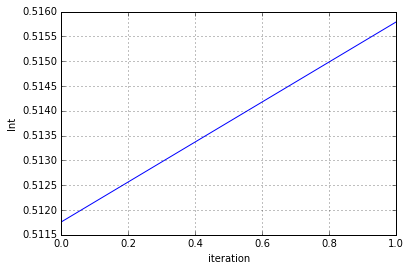

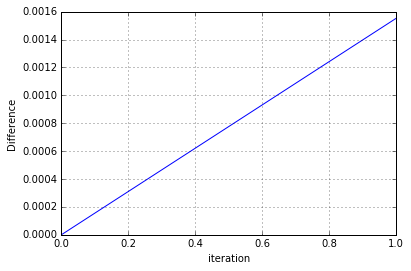

0.322094202041626 секунд


In [6]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import time
%matplotlib inline
start=time.time()
n=1000
e=0.01
i=1
eps=0.001
B=[]
def y(x,i):
    y=m.sin(x)*m.e**(-i*x)
    return y
A=[1]
dx=0.1
I=0
j=0
k=0
delta=1
while delta>e:
    k+=1
    I+=(y(j+dx,i)+y(j,i))/2*dx
    j+=dx
    A.append(I)
    delta=abs((A[k]-A[k-1])/A[k])
b=j
J=I
I=0
A=[J]
Int=[J]
Xtr=np.arange(0,b,dx)
Ytr=[y(x,i) for x in Xtr]
Itr=np.trapz(Ytr,Xtr,dx)
Itrapz=[Itr]
delta=1
Integr=1
j=0
k=0
while delta>e:
    k+=1
    dx*=0.5
    while j<b+dx:
        I+=dx*(y(j+dx,i)+y(j,i))/2
        j+=dx
    A.append(I)
    delta=abs((A[k]-A[k-1])/A[k-1])
    Int.append(I)
    Xtr=np.arange(0,b+dx,dx)
    Ytr=[y(x,i) for x in Xtr]
    Itr=np.trapz(Ytr,Xtr)
    Itrapz.insert(k,Itr)
iteration=range(0,k+1)
print("Значение интеграла, посчитанного методом трапеций I=",I)
print("Значение интеграла через функцию numpy.trapz Itrapz=",Itr)
plt.plot(iteration,Int)
plt.xlabel('iteration')
plt.ylabel('Int')
plt.grid()
plt.show()
plt.plot(iteration,np.array(Int)-np.array(Itrapz))
plt.xlabel('iteration')
plt.ylabel('Difference')
plt.grid()
plt.show()
print(time.time()-start,"секунд")

# Задание 2 
## Решение СЛАУ методом минимальной невязки
Системы $n$ линейных уравнений с $n$ неизвестными $x_1$, $x_2$, ..., $x_n$  в общем случае принято записывать следующим образом:
$$\sum_{j=1}^{n}a_{ij}x_j=b_i;\;\;\;i\in(1,n)$$
де $а_{ij}$  и  $b_{i}$ – произвольные константы. Число n неизвестных называется порядком системы.

Решением уравнения является такая совокупность значений переменных х1, х2,…, хn, которая одновременно обращает все уравнения системы в тождество.

Необходимым и достаточным условием существования и единственности решения системы  уравнений является линейная независимость уравнений. Или, более точно, неравенство нулю определителя, составленного из коэффициентов системы уравнений:
$$detA\neq0$$

Эквивалентной (и весьма удобной) записью системы линейных уравнений является матричная запись
$$A\cdot X=B$$
В чем легко убедится, если воспользоваться правилами перемножения матриц: элемент, стоящий на пересечении i-й строки и j-го столбца матрицы-результата есть скалярное произведение i-й вектор-строки первой матрицы и j-го вектор-столбца второй матрицы.

Коэффициенты при неизвестных образуют квадратную матрицу размером n x n, переменные и свободные члены уравнений – векторы-столбцы длиной n

Решение системы уравнений есть вектор $X^*$, который обращает это матричное уравнение в тождество.
Для решения системы линейных уравнений применяются точные методы (прямые) в которых количество арифметических, необходимых для нахождения решения, операций точно определяется порядком системы и итерационные (приближенные) методы, в которых проводится пошаговое, итерационное  уточнение решения.

Оценить близость какого-либо вектора $X_i$ к решению системы уравнений можно оценив близость  вектора невязок , вычисляемого приведенным ниже образом, к нулевому вектору:
$$\Delta=B-A\cdot X$$
### Метод минимальных невязок

Для решения линейных систем уравнений можно применять и различные методы поиска экстремумов. Проблема решения системы уравнений заменяется эквивалентной задачей нахождения экстремума функции n переменных.
Одним из таких методов является метод минимальных невязок
$\Delta=B-A\cdot X$
.Очевидно, что если на место вектора (Х) подставить вектор решения, то второе слагаемое окажется равным вектору свободных членов и вектор невязок становится нулевым.

Таким образом, минимизация компонентов вектора невязок эквивалентна задаче решения уравнений. Что бы знак невязок не влиял на результат, минимизируют сумму квадратов невязок
\;
Запишем итерационную формулу поиска решения в следующем виде:
$$X^{(k+1)}=X^{(k)}-\tau_k\cdot \Delta^{(k)}$$
где $\tau_k$ - константа, которая расчитывается из условия минимума нормы вектора невязок на следующем шаге
$$\tau_k=-\frac{((A\cdot D^{(k)}),D^{(k)})}{((A\cdot D^{(k)}),(A\cdot D^{(k)}))}$$
Окнчательно метод выглядит следующим образом:$$\;$$
1.Задается начальное приближение $X$;$$\;$$
2.Расчитывается вектор невязок $\Delta$;$$\;$$
3.Расчитывается $\tau$;$$\;$$
4.Расчитывается новое приближение к решению: $X+=-\tau\cdot \Delta$ $$\;$$
5.Если не достигнута заданная точность - возвращаемся к пункту 2$$\;$$
Для окончательного расчета необходимо чтобы $\frac{D_i}{x_i}<eps$ при всех i. Но так как метод быстро сходится, нам будет достаточно найти погрешность хотя бы при одном i, этого, как можно убедить ниже, достаточно для получения заданной точности


### Решение системы для n=1000
Для сравнения также решим систему с помощью функции linalg.solve

In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
import time
start=time.time()
n=1000
e=0.01
eps=0.001
def y(x,i):
    y=m.sin(x)*m.e**(-i*x)
    return y
def I(i):
    A=[0]
    dx=0.05
    I=0
    j=0
    k=0
    delta=1
    while delta>e:
        k+=1
        I+=(y(j+dx,i)+y(j,i))/2*dx
        j+=dx
        A.append(I)
        delta=abs((A[k]-A[k-1])/A[k])
    b=j
    J=I
    I=0
    A=[J]
    delta=1
    Integr=1
    j=0
    k=0
    while delta>e:
        k+=1
        while j<b+dx:
            I+=dx*(y(j+dx,i)+y(j,i))/2
            j+=dx
        A.append(I)
        delta=abs((A[k]-A[k-1])/A[k-1])
        dx*=0.5
    return (I)
B=[I(i) for i in range (0,n)]
A=np.zeros((n,n))
for k in range(0,n):
    for l in range(0,n):
        A[k,l]=-((l+1)*(l+1)*(l+1)*m.sin(l+1)/(1+(k+1)*(k+1)))
        if k==l:
            A[k,l]+=n*n*n*n
X=np.ones((n))
X*=0.0000000000000174
D=B-np.dot(A,X)
a=1
k=0
while a>0:
    k+=1
    a=0
    t=(np.dot(np.dot(A,D),D))/(np.dot(np.dot(A,D),np.dot(A,D)))
    X+=t*D
    D=B-np.dot(A,X)
    #for m in range (0,n):
    if abs(D[1]/X[1])>eps:
        a+=1
Xn=np.linalg.solve(A,B)
alfa=12
print("Метод минимальной незязки: Х(",alfa,")=",X[alfa])
print("Функция linalg.solve: Х(",alfa,")=",Xn[alfa])
print(time.time()-start,"секунд")

Метод минимальной незязки: Х( 12 )= 6.65184910538e-15
Функция linalg.solve: Х( 12 )= 6.65184910538e-15
2.0157630443573 секунд


### Решение системы для n=10000

In [2]:
import numpy as np
import math as m
import time
start=time.time()
n=10000
e=0.01
eps=0.001
def y(x,i):
    y=m.sin(x)*m.e**(-i*x)
    return y
def I(i):
    A=[0]
    dx=0.1
    I=0
    j=0
    k=0
    delta=1
    while delta>e:
        k+=1
        I+=(y(j+dx,i)+y(j,i))/2*dx
        j+=dx
        A.append(I)
        delta=abs((A[k]-A[k-1])/A[k])
    b=j
    J=I
    I=0
    A=[J]
    delta=1
    Integr=1
    j=0
    k=0
    while delta>e:
        k+=1
        while j<b+dx:
            I+=dx*(y(j+dx,i)+y(j,i))/2
            j+=dx
        A.append(I)
        delta=2*abs((A[k]-A[k-1])/A[k-1])
        dx*=0.5
    return (I)
B=[I(i) for i in range (0,n)]
A=np.zeros((n,n))
for k in range(0,n):
    for l in range(0,n):
        A[k,l]=-((l+1)*(l+1)*(l+1)*m.sin(l+1)/(1+(k+1)*(k+1)))
        if k==l:
            A[k,l]+=n*n*n*n
X=np.ones((n))
X*=0.0000000000000174
D=B-np.dot(A,X)
a=1
k=0
while a>0:
    k+=1
    a=0
    t=(np.dot(np.dot(A,D),D))/(np.dot(np.dot(A,D),np.dot(A,D)))
    X+=t*D
    D=B-np.dot(A,X)
    if abs(D[1]/X[1])>eps:
        a+=1
Xn=np.linalg.solve(A,B)
alfa=12
print("Метод минимальной незязки: Х(",alfa,")=",X[alfa])
print("Функция linalg.solve: Х(",alfa,")=",Xn[alfa])
print(time.time()-start,"секунд")

Метод минимальной незязки: Х( 12 )= 6.65184910537e-19
Функция linalg.solve: Х( 12 )= 6.65184910537e-19
178.50567960739136 секунд


  ### График решения
  Построим график зависимости решения $x_i(i)$, график нормы решения от номера итерации, а так же график решения, полученного с помощью linalg.solve

In [42]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
n=1000
e=0.01
eps=0.001
def y(x,i):
    y=m.sin(x)*m.e**(-i*x)
    return y
def I(i):
    A=[0]
    dx=0.05
    I=0
    j=0
    k=0
    delta=1
    while delta>e:
        k+=1
        I+=(y(j+dx,i)+y(j,i))/2*dx
        j+=dx
        A.append(I)
        delta=abs((A[k]-A[k-1])/A[k])
    b=j
    J=I
    I=0
    A=[J]
    delta=1
    Integr=1
    j=0
    k=0
    while delta>e:
        k+=1
        while j<b+dx:
            I+=dx*(y(j+dx,i)+y(j,i))/2
            j+=dx
        A.append(I)
        delta=2*abs((A[k]-A[k-1])/A[k-1])
        dx*=0.5
    return (I)
B=[I(i) for i in range (0,n)]
A=np.zeros((n,n))
for k in range(0,n):
    for l in range(0,n):
        A[k,l]=-((l+1)*(l+1)*(l+1)*m.sin(l+1)/(1+(k+1)*(k+1)))
        if k==l:
            A[k,l]+=n*n*n*n
X=np.ones((n))
X*=0.0000000000000174
D=B-np.dot(A,X)
a=1
k=0
Xnorm=[np.dot(X,X)]
while a>eps:
    k+=1
    a=0
    t=(np.dot(np.dot(A,D),D))/(np.dot(np.dot(A,D),np.dot(A,D)))
    X+=t*D
    D=B-np.dot(A,X)
    a=abs(D[1]/X[1])>eps
    Xnorm.append(np.dot(X,X))
Xn=np.linalg.solve(A,B)
alfa=920
print("Метод минимальной незязки: Х(",alfa,")=",X[alfa])
print("Функция linalg.solve: Х(",alfa,")=",Xn[alfa])
iter=range(0,k+1)
print("количество итераций k=",k)

Метод минимальной незязки: Х( 920 )= 9.7723808326e-31
Функция linalg.solve: Х( 920 )= 9.75841402637e-31
количество итераций k= 3


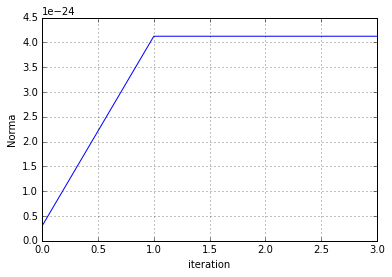

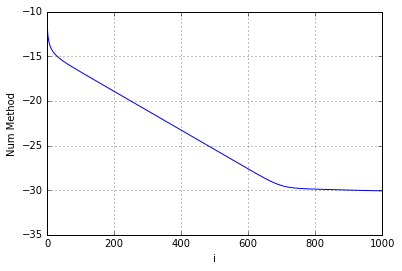

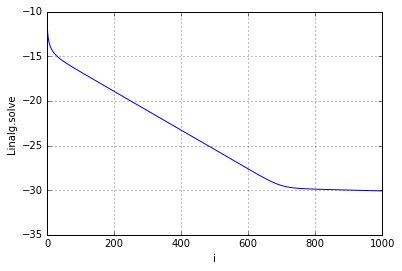

In [43]:
plt.plot(iter,Xnorm)
plt.xlabel('iteration')
plt.ylabel('Norma')
plt.grid()
plt.show()
plt.figure()
number=range(0,n)
plt.plot(number,np.log10(X))
plt.xlabel('i')
plt.ylabel('Num Method')
plt.grid()
plt.show()
plt.plot(number,np.log10(Xn))
plt.xlabel('i')
plt.ylabel('Linalg.solve')
plt.grid()
plt.show()